<a href="https://colab.research.google.com/github/positivezenart/100_days_python/blob/master/Programming_Languages_stack_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange:

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [70]:
df=pd.read_csv('/content/QueryResults.csv')

In [71]:
df.rename(columns={'m': 'Date','Unnamed: 2':'Posts'}, inplace=True)

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [72]:
df.head()

,Date,TagName,Posts
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,c,83
3,2008-08-01 00:00:00,c#,504
4,2008-08-01 00:00:00,c++,164


In [54]:
df.tail()

,Date,TagName,Posts
2588,2024-02-01 00:00:00,php,1657
2589,2024-02-01 00:00:00,python,9207
2590,2024-02-01 00:00:00,r,1937
2591,2024-02-01 00:00:00,ruby,168
2592,2024-02-01 00:00:00,swift,804


**Challenge:** Check how many rows and how many columns there are.
What are the dimensions of the dataframe?

In [55]:
print(f"Total number of rows ={df.shape[0]}")
print(f"Total number of columns ={df.shape[1]}")

Total number of rows =2593
Total number of columns =3


**Challenge**: Count the number of entries in each column of the dataframe

In [56]:
df.count()

Date       2593
TagName    2593
Posts      2593
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [57]:
df.groupby('TagName').sum()

<ipython-input-57-cbb9e800e072>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('TagName').sum()


,Posts
TagName,
assembly,44082
c,403218
c#,1612873
c++,805512
delphi,51762
go,72496
java,1915156
javascript,2525325
perl,68055


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry?


In [9]:
df.groupby('TagName').count()

,Date,Posts
TagName,,
assembly,187,187
c,187,187
c#,188,188
c++,187,187
delphi,187,187
go,172,172
java,187,187
javascript,187,187
perl,187,187


## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [73]:
df['Date'] = pd.to_datetime(df['Date'])

In [74]:
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')

In [75]:
df.head()

,Date,TagName,Posts
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,83
3,2008-08-01,c#,504
4,2008-08-01,c++,164


## Data Manipulation



In [61]:
reshaped_df = df.pivot(index='Date',columns='TagName',values='Posts')

In [16]:
reshaped_df.head()

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,83.0,504.0,164.0,14.0,NaN,222.0,163.0,28.0,157.0,119.0,NaN,70.0,NaN
2008-09-01,28.0,320.0,1639.0,755.0,104.0,NaN,1129.0,634.0,130.0,474.0,537.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1987.0,807.0,112.0,NaN,1149.0,722.0,128.0,608.0,506.0,NaN,247.0,NaN
2008-11-01,16.0,258.0,1729.0,734.0,140.0,NaN,954.0,580.0,97.0,499.0,448.0,1.0,157.0,NaN


**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [15]:
reshaped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 2008-07-01 to 2024-02-01
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   assembly    187 non-null    float64
 1   c           187 non-null    float64
 2   c#          188 non-null    float64
 3   c++         187 non-null    float64
 4   delphi      187 non-null    float64
 5   go          172 non-null    float64
 6   java        187 non-null    float64
 7   javascript  187 non-null    float64
 8   perl        187 non-null    float64
 9   php         187 non-null    float64
 10  python      187 non-null    float64
 11  r           185 non-null    float64
 12  ruby        187 non-null    float64
 13  swift       178 non-null    float64
dtypes: float64(14)
memory usage: 26.1+ KB


In [17]:
print(f"Total number of rows ={reshaped_df.shape[0]}")
print(f"Total number of columns ={reshaped_df.shape[1]}")

Total number of rows =188
Total number of columns =14


In [18]:
reshaped_df.tail()

TagName,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
Date,,,,,,,,,,,,,,
2023-10-01,174.0,972.0,3192.0,1713.0,165.0,421.0,3432.0,5480.0,53.0,1545.0,9024.0,2065.0,195.0,903.0
2023-11-01,172.0,958.0,3117.0,1469.0,103.0,409.0,3282.0,5196.0,44.0,1402.0,8476.0,1998.0,157.0,868.0
2023-12-01,181.0,878.0,2651.0,1435.0,75.0,326.0,2546.0,4785.0,53.0,1205.0,7023.0,1606.0,154.0,745.0
2024-01-01,177.0,828.0,2701.0,1592.0,90.0,345.0,2872.0,5156.0,34.0,1406.0,7795.0,1816.0,163.0,871.0
2024-02-01,161.0,856.0,3173.0,1877.0,125.0,379.0,3560.0,5575.0,38.0,1657.0,9207.0,1937.0,168.0,804.0


**Challenge**: Count the number of entries per programming language. Why might the number of entries be different?

In [19]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TagName')

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

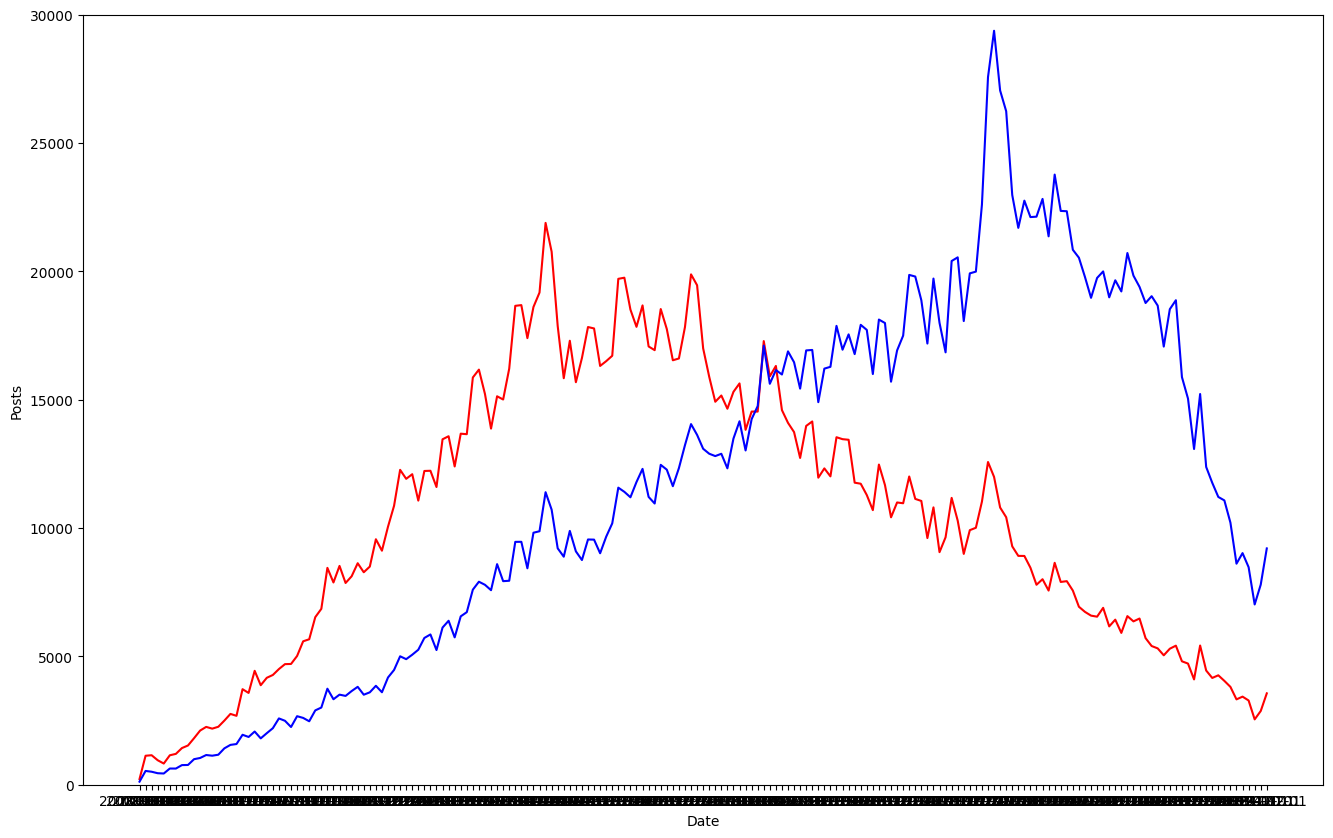

In [76]:
jav_df =df[df['TagName']=='java']
python_df =df[df['TagName']=='python']
plt.figure(figsize=(16,10))
plt.plot(jav_df['Date'],jav_df['Posts'],color='r',label='Java')
plt.plot(python_df['Date'],python_df['Posts'],color='b',label='Python')
plt.xlabel("Date")
plt.ylabel("Posts")
plt.ylim(0,30000)
plt.show()

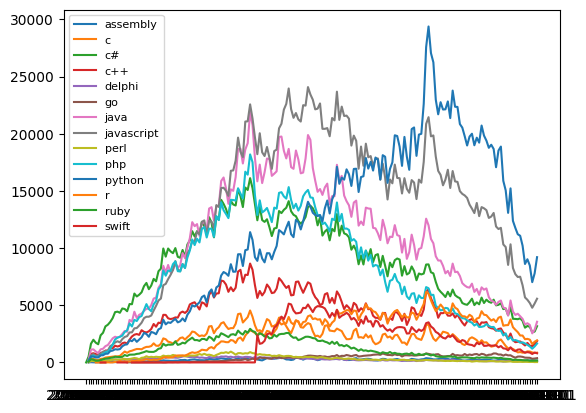

In [82]:
for column in reshaped_df.columns:
   plt.plot(reshaped_df.index,reshaped_df[column],label=reshaped_df[column].name)
plt.legend(fontsize=8)

In [83]:
roll_df = reshaped_df.rolling(window=6).mean()

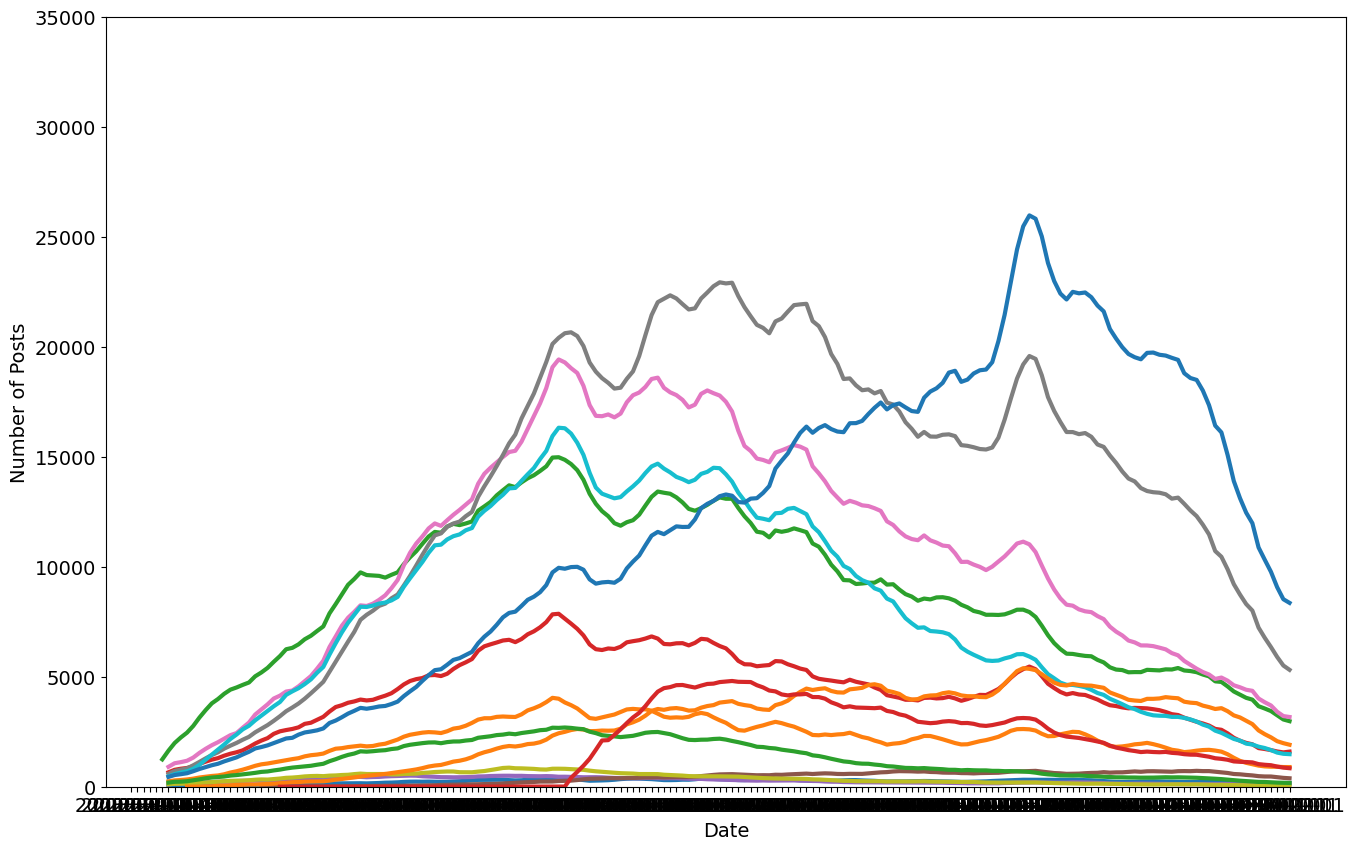

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

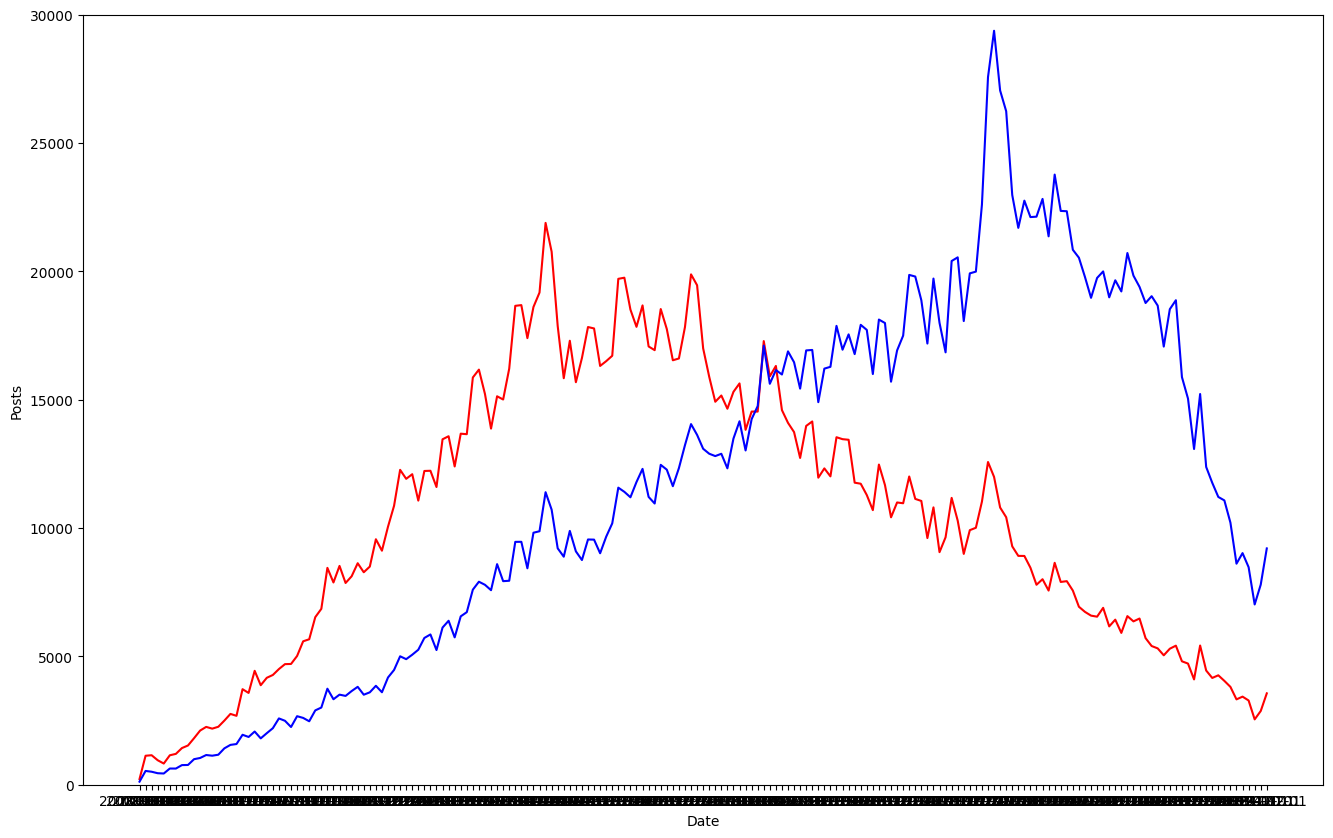

In [87]:
jav_df =df[df['TagName']=='java']
python_df =df[df['TagName']=='python']
plt.figure(figsize=(16,10))
plt.plot(jav_df['Date'],jav_df['Posts'],color='r',label='Java')
plt.plot(python_df['Date'],python_df['Posts'],color='b',label='Python')
plt.xlabel("Date")
plt.ylabel("Posts")
plt.ylim(0,30000)
plt.show()

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html).

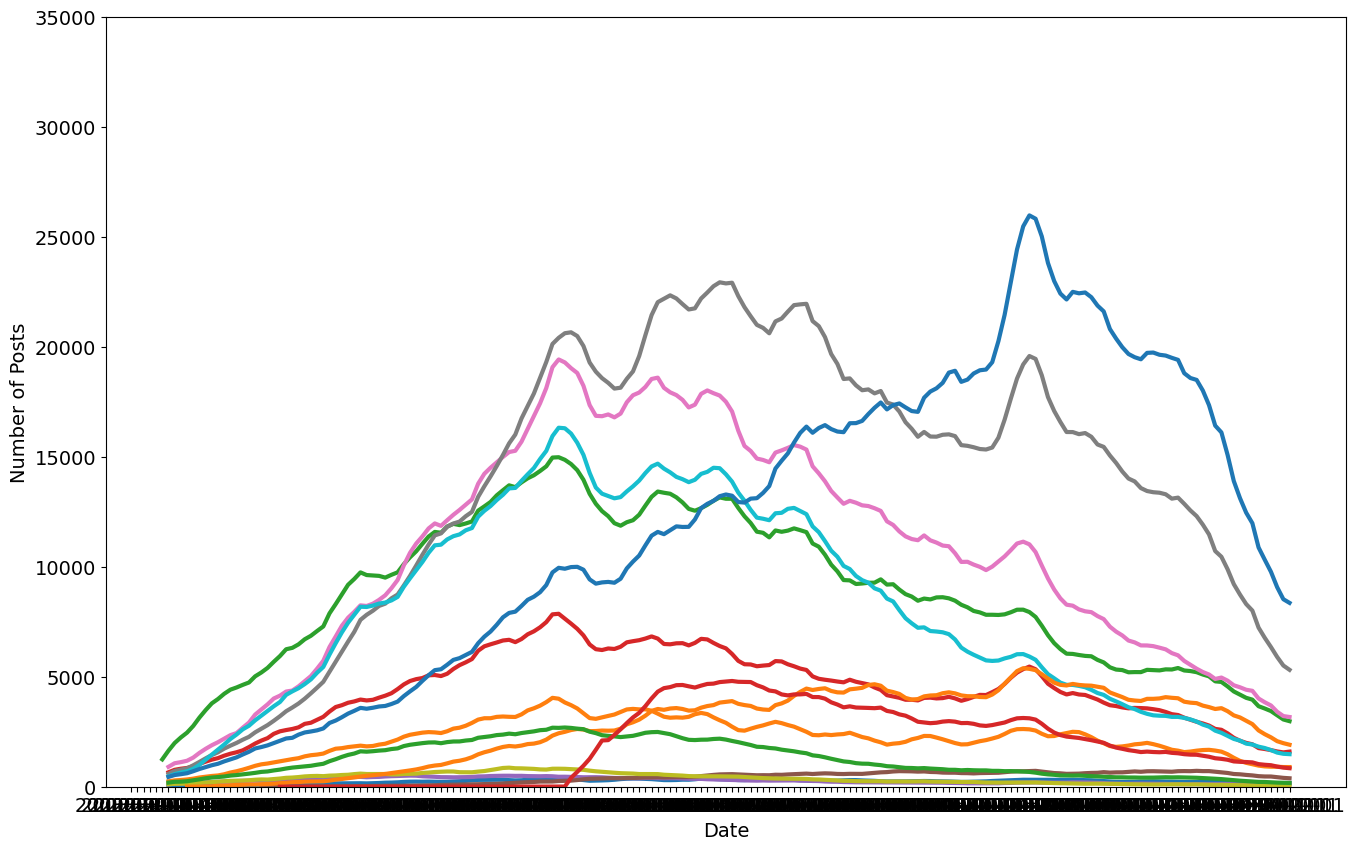

In [86]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)


for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column],
             linewidth=3, label=roll_df[column].name)

**Observation:**
1. Python is the most popular programming
2. language in recent years
Javascript has most number of posts in stackoverflow
3. Perl and assembly languages are least popular in stack overflow